# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-11-101-A-rep1_CRR_DiadFit,103.692072,0.016041,1284.838943,0.014282,158.405241,1284.838943,407.906262,0.932557,2.586405,...,1.397196,0.661304,0.011774,1.058411,1.122523,0.084856,0.004574,PseudoVoigtModel,PseudoVoigtModel,No
1,186-11-101-A-rep2,103.661302,0.018792,1284.833183,0.017096,113.616763,1284.833183,291.586779,0.946375,2.094983,...,1.493671,0.680269,0.016659,1.032787,1.065630,0.047458,0.006215,PseudoVoigtModel,PseudoVoigtModel,No
2,186-11-101-A-rep3,103.717194,0.025401,1284.793980,0.023208,83.333953,1284.793980,207.108168,0.919407,1.981858,...,1.536256,0.945065,0.022066,1.007463,1.090278,0.010240,0.007604,PseudoVoigtModel,PseudoVoigtModel,No
3,186-11-101-B-rep1,103.574139,0.022196,1285.097484,0.019878,160.298190,1285.097484,352.166183,0.871740,3.826893,...,1.366894,0.557758,0.010876,1.012225,1.067797,0.016306,0.004221,PseudoVoigtModel,PseudoVoigtModel,No
4,186-11-101-D-rep1,103.725232,0.084911,1284.633210,0.081969,25.415653,1284.633210,62.327266,1.151900,2.130912,...,1.312176,0.866599,0.090645,1.012563,1.103383,0.016387,0.017486,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4-start-rep1.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 135/135 [00:20<00:00,  6.64it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start-rep1.txt,"June 25, 2024\n",June,25.0,5.948,45.0,5.0,50.0,"['0h', '3m', '46s']",11:05:40 AM\n,39940.0,1324.964
1,FG04-A1-4-start-rep2.txt,"June 25, 2024\n",June,25.0,6.013,45.0,5.0,50.0,"['0h', '3m', '46s']",11:10:49 AM\n,40249.0,1324.964
2,FG04-A1-4-start-rep3.txt,"June 25, 2024\n",June,25.0,6.067,45.0,5.0,50.0,"['0h', '3m', '46s']",11:15:46 AM\n,40546.0,1324.964
3,FG04-A1-16-start-rep1.txt,"June 25, 2024\n",June,25.0,6.071,45.0,5.0,50.0,"['0h', '3m', '46s']",11:20:17 AM\n,40817.0,1324.964
4,FG04-A1-16-start-rep2.txt,"June 25, 2024\n",June,25.0,6.029,45.0,5.0,50.0,"['0h', '3m', '46s']",11:27:13 AM\n,41233.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start-rep1'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start-rep1', 'FG04-A1-4-start-rep2',
       'FG04-A1-4-start-rep3', 'FG04-A1-16-start-rep1',
       'FG04-A1-16-start-rep2', 'FG04-A1-16-start-rep3',
       '186-11-101-A-rep1', '186-11-101-A-rep2', '186-11-101-A-rep3',
       '186-11-101-B-rep1', '186-11-101-B-rep2', '186-11-101-B-rep3',
       '186-11-101-C-rep1', '186-11-101-C-rep2', '186-11-101-C-rep3',
       '186-11-101-D-rep1', '186-11-107-A-rep1', '186-11-107-A-rep2',
       '186-11-107-A-rep3', '186-11-107-B-rep1', '186-11-107-B-rep2',
       '186-11-107-B-rep3', '186-11-107-C', '186-11-107-C-6mw-rep1',
       '186-11-107-C-6mw-rep2', '186-11-107-C-6mw-rep3',
       '186-11-107-D-6mw-rep1', '186-11-107-D-6mw-rep2',
       '186-11-107-D-6mw-rep3', '186-11-107-E-6mw-rep1',
       '186-11-107-E-6mw-rep2', '186-11-107-E-6mw-rep3', '186-11-106-A',
       '186-11-106-B-rep1', '186-11-106-B-rep2', '186-11-106-B-rep3',
       '186-11-106-C', '186-11-106-D', '186-11-106-E', '186-11-106-F',
       '186-11-105-A', '186-

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-11-101-A-rep1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-11-101-A-rep1', '186-11-101-A-rep2', '186-11-101-A-rep3',
       '186-11-101-B-rep1', '186-11-101-D-rep1', '186-11-107-A-rep1',
       '186-11-107-A-rep2', '186-11-107-A-rep3', '186-11-107-B-rep1',
       '186-11-107-B-rep2', '186-11-107-B-rep3', '186-11-107-C',
       '186-11-107-C-6mw-rep1', '186-11-107-C-6mw-rep2',
       '186-11-107-C-6mw-rep3', '186-11-107-D-6mw-rep1',
       '186-11-107-D-6mw-rep2', '186-11-107-D-6mw-rep3',
       '186-11-107-E-6mw-rep1', '186-11-107-E-6mw-rep2',
       '186-11-107-E-6mw-rep3', '186-11-106-A', '186-11-106-B-rep1',
       '186-11-106-B-rep2', '186-11-106-B-rep3', '186-11-106-E',
       '186-11-106-F', '186-11-105-B', '186-11-103-B',
       '186-11-108-A-rep1', '186-11-108-A-rep2', '186-11-108-A-rep3',
       '186-11-109-A', '186-11-109-B', '186-11-101-B-rep2',
       '186-11-101-B-rep3', '186-11-101-C-rep1', '186-11-101-C-rep2',
       '186-11-101-C-rep3', '186-11-106-C', '186-11-106-D',
       '186-11-105-A', '186-11-104-A', '186-11-1

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-11-101-A-rep1,103.692072,0.016041,1284.838943,0.014282,158.405241,1284.838943,407.906262,0.932557,2.586405,...,June,25.0,11.961,60.0,4.0,50.0,"['0h', '4m', '2s']",12:39:24 PM\n,45564.0,1324.964
1,186-11-101-A-rep2,103.661302,0.018792,1284.833183,0.017096,113.616763,1284.833183,291.586779,0.946375,2.094983,...,June,25.0,11.948,60.0,4.0,50.0,"['0h', '4m', '1s']",12:44:00 PM\n,45840.0,1324.964
2,186-11-101-A-rep3,103.717194,0.025401,1284.793980,0.023208,83.333953,1284.793980,207.108168,0.919407,1.981858,...,June,25.0,11.943,60.0,4.0,50.0,"['0h', '4m', '1s']",12:49:33 PM\n,46173.0,1324.964
3,186-11-101-B-rep1,103.574139,0.022196,1285.097484,0.019878,160.298190,1285.097484,352.166183,0.871740,3.826893,...,June,25.0,11.953,60.0,4.0,50.0,"['0h', '4m', '1s']",12:56:18 PM\n,46578.0,1324.964
4,186-11-101-D-rep1,103.725232,0.084911,1284.633210,0.081969,25.415653,1284.633210,62.327266,1.151900,2.130912,...,June,25.0,12.009,60.0,4.0,100.0,"['0h', '4m', '1s']",1:26:51 PM\n,48411.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.1913348265433373e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-101-A-rep1,0.296052,0.007197,0.006801,0.002352,103.474076,0.016053,0.001213,0.016041,11.961,...,45564.0,1094.078404,3150.604368,191.578689,Spline,3.080934,45564.0,0.997898,0.997886,0.997909
1,186-11-101-A-rep2,0.282982,0.008263,0.007921,0.002354,103.443146,0.018791,0.001211,0.018792,11.948,...,45840.0,1087.850114,429.520923,52.022904,Spline,0.576130,45840.0,0.997895,0.997884,0.997907
2,186-11-101-A-rep3,0.306486,0.011049,0.010796,0.002351,103.498653,0.025377,0.001210,0.025401,11.943,...,46173.0,1088.047838,633.335749,64.328532,Spline,1.123694,46173.0,0.997893,0.997881,0.997905
3,186-11-101-B-rep1,0.246326,0.009520,0.009223,0.002359,103.355583,0.022182,0.001206,0.022196,11.953,...,46578.0,NaN,NaN,NaN,NaN,NaN,46578.0,0.997890,0.997878,0.997902
4,186-11-101-B-rep2,0.261647,0.004570,0.003916,0.002356,103.392326,0.009365,0.001206,0.009306,11.953,...,46876.0,NaN,NaN,NaN,NaN,NaN,46876.0,0.997888,0.997876,0.997899


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.1913348265433373e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,186-11-101-A-rep1,0.296052,0.007197,0.006801,0.002352,103.474076,0.016053,0.001213,0.016041,11.961,...,45564.0,1094.078404,3150.604368,191.578689,Spline,3.080934,45564.0,0.997898,0.997886,0.997909
1,186-11-101-A-rep2,0.282982,0.008263,0.007921,0.002354,103.443146,0.018791,0.001211,0.018792,11.948,...,45840.0,1087.850114,429.520923,52.022904,Spline,0.576130,45840.0,0.997895,0.997884,0.997907
2,186-11-101-A-rep3,0.306486,0.011049,0.010796,0.002351,103.498653,0.025377,0.001210,0.025401,11.943,...,46173.0,1088.047838,633.335749,64.328532,Spline,1.123694,46173.0,0.997893,0.997881,0.997905
3,186-11-101-B-rep1,0.246326,0.009520,0.009223,0.002359,103.355583,0.022182,0.001206,0.022196,11.953,...,46578.0,NaN,NaN,NaN,NaN,NaN,46578.0,0.997890,0.997878,0.997902
4,186-11-101-B-rep2,0.261647,0.004570,0.003916,0.002356,103.392326,0.009365,0.001206,0.009306,11.953,...,46876.0,NaN,NaN,NaN,NaN,NaN,46876.0,0.997888,0.997876,0.997899


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 25, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

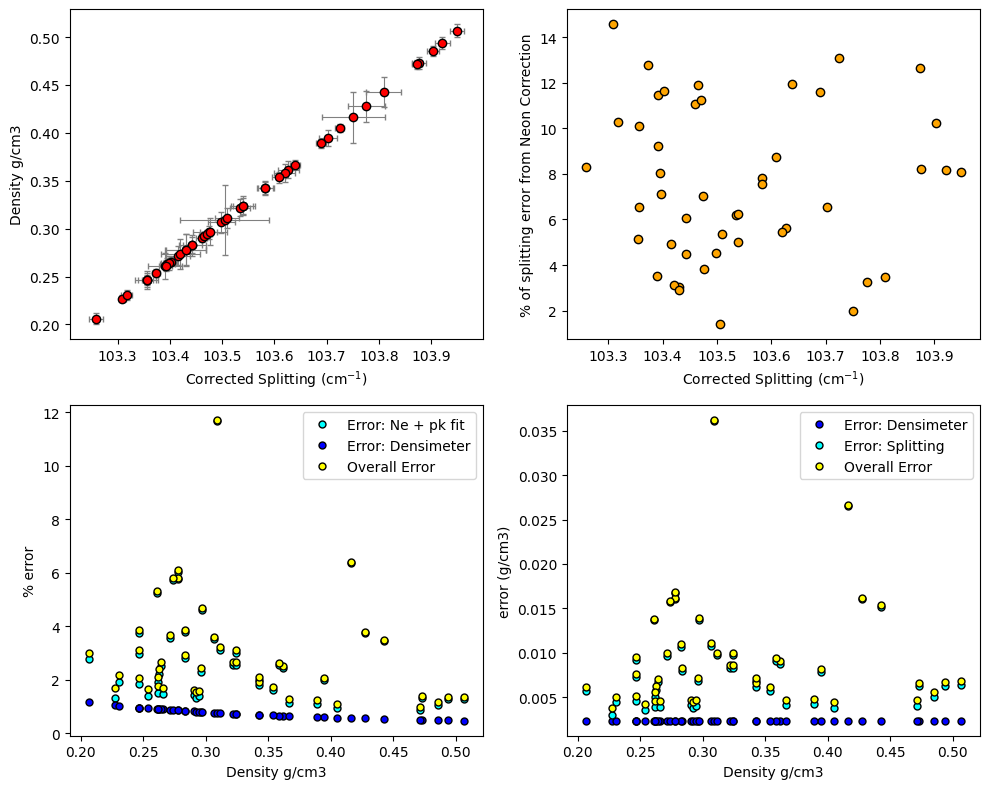

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

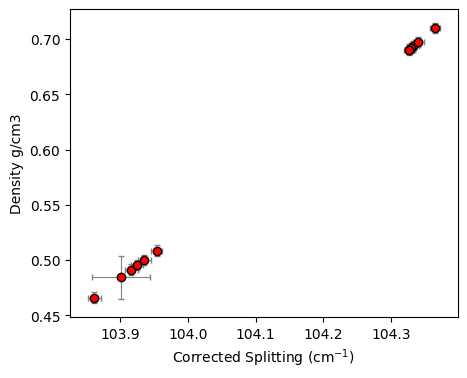

In [21]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [22]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

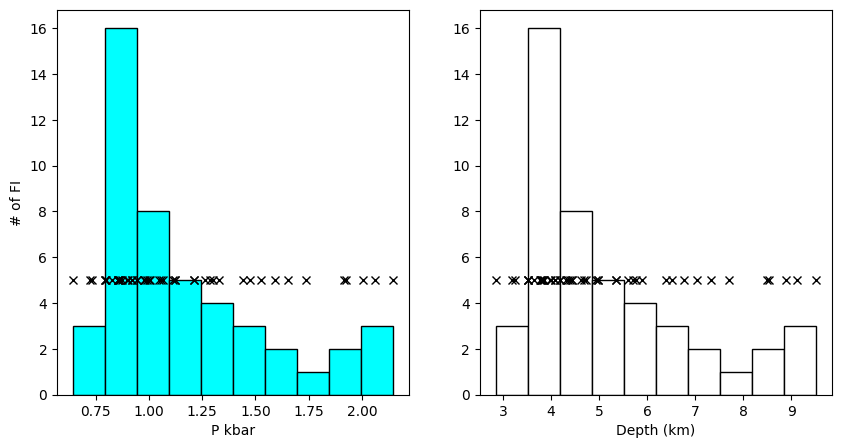

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()